# Подгрузка библиотек

In [1]:
from matplotlib import pyplot as plt # Построение графиков
import numpy as np # Работа с массивами чисел
import pandas as pd # Работа с раблицами

# Загружаем данные функцией load_iris из sklearn
from sklearn.datasets import load_iris 

# load_iris возвращает объект с несколькими полями

# Функции

In [2]:
def fit_model(features, labels):
    '''Обучение простой пороговой модели'''
    best_acc = -1.0  # задаём начальное значение точности

    for fi in range(features.shape[1]):# проходимся по каждому столбцу
        thresh = features[:, fi].copy()# В переменную thresh кидаем копию столбца
        # проверяем все признаки в следующем порядке:
        thresh.sort() # сортировка столбца (По возрастанию)
        for t in thresh:# проходимся  по столбцу
            pred = (features[:, fi] > t) #создаём булевую маску по условию

            # Measure the accuracy of this
            acc = (pred == labels).mean() #берём среднее значение от 
                                          #получившегося массива, в результате 
                                          #наложения маски
                                          # получаем точность

            rev_acc = (pred == ~labels).mean() #тоже самое только 
                                               #от обратного
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse

    # Модель представляет собой порог, и индекс
    return best_t, best_fi, best_reverse


def predict(model, features):
    '''Применяем изученную модель'''
    # Переменная модель представляет собой пару, возвращаемый fit_model
    t, fi, reverse = model
    if reverse: # Возврат булевой маски исходя из входящих параметров
        return features[:, fi] <= t
    else:
        return features[:, fi] > t


def accuracy(features, labels, model):
    '''Вычисление точности модели'''
    preds = predict(model, features)
    return np.mean(preds == labels)

# Загрузка данных

In [3]:
data = load_iris()
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

In [4]:
print(features[:5])
print(feature_names) # Чачшелистник / лепесток
print(target[:5])
print(target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


# Строим графики

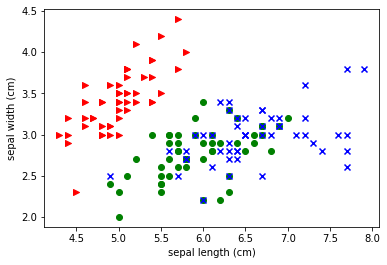

In [5]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,0],
                features[target == t,1],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[0]}')
    ax.set_ylabel(f'{feature_names[1]}')

plt.show()

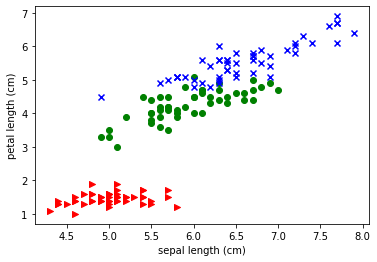

In [6]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,0],
                features[target == t,2],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[0]}')
    ax.set_ylabel(f'{feature_names[2]}')

plt.show()

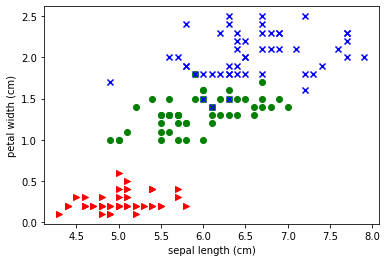

In [7]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,0],
                features[target == t,3],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[0]}')
    ax.set_ylabel(f'{feature_names[3]}')

plt.show()

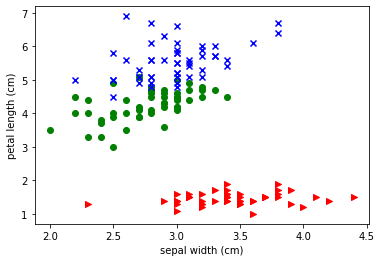

In [8]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,1],
                features[target == t,2],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[1]}')
    ax.set_ylabel(f'{feature_names[2]}')

plt.show()

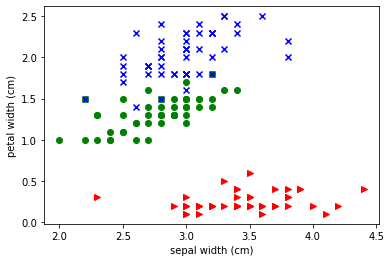

In [9]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,1],
                features[target == t,3],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[1]}')
    ax.set_ylabel(f'{feature_names[3]}')

plt.show()

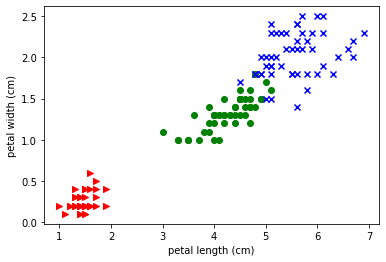

In [10]:
fig, ax = plt.subplots()
for t in range(3):
    if t == 0: 
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    ax.scatter(features[target == t,2],
                features[target == t,3],
                marker=marker,
                c=c)
    ax.set_xlabel(f'{feature_names[2]}')
    ax.set_ylabel(f'{feature_names[3]}')

plt.show()

# Просмотр данных

In [11]:
df = pd.DataFrame(features)
df[4] = target

In [12]:
df.columns = ['sepal length (cm)',
              'sepal width (cm)',
              'petal length (cm)',
              'petal width (cm)',
              'y']

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   y                  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df['y'].unique()

array([0, 1, 2])

# Построение моделей

In [16]:
# Используем индексирование Numpy, чтобы получить массив строк
labels = target_names[target]
# Длина лепестка - прзнак в позиции 2
plength = features[:,2]
# Строим массив булевых значений
is_setosa = (labels=='setosa')
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print(f'Max of setosa: {round(max_setosa,2)}')
print(f'Min of others: {round(min_non_setosa,2)}')

Max of setosa: 1.9
Min of others: 3.0


Таким образом, мы посторили простую модель классификации,где если длина лепестка меньше 1.9, то это Iris Setosa, если больше, то это Iris Virginica, Iris Versicolor

In [17]:
features_  = features[~is_setosa]
labels_ = labels[~is_setosa]
# Создаём новую целевую переменную is_virginica
is_virginica = (labels_ == "virginica")

#Инициализируем best_acc значением, меньшим возможного
best_acc = -1.0
for fi in range(features.shape[1]):# проходимся по каждому столбцу
    # Мы собираемся проверить все возможные пороги
    thresh = features_[:,fi] # В переменную thresh кидаем копию столбца
    for t in thresh:

        # Get the vector for feature `fi`
        feature_i = features_[:, fi]
        # apply threshold `t`
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()#берём среднее значение от 
                                          #получившегося массива, в результате 
                                          #наложения маски
                                          # получаем точность

        rev_acc = (pred == ~is_virginica).mean()#тоже самое только 
                                                #от обратного
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False

        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

print(best_acc, best_fi, best_t, best_reverse)

0.94 3 1.6 False


In [18]:
def is_virginica_test(fi,t,reverse,example):
    "Применяем пороговую модель к новому примеру"
    
    test = example[fi]>t
    if reverse:
        test = not test
    
    return test

In [19]:
features = data['data']
labels = data['target_names'][data['target']]

# Мы собираемся удалить примеры setosa, поскольку они слишком просты:
is_setosa = (labels == 'setosa') #сортировка по классу setosa
features_ = features[~is_setosa]
labels_ = labels[~is_setosa] # признаки и подписи без класса setosa

# Теперь мы классифицируем virginica и non-virginica
is_virginica = (labels_ == 'virginica')

# Разделите данные на две части: тестирование и обучение
testing = np.tile([True, False], 50) # testing = [True,False,True,False,True,False...]

# training - это отрицание testing: то есть точки данных, 
# не используемые для тестирования, будут использоваться для обучения.
training = ~testing

# Загружаем данные в функцию fit_model
model = fit_model(features_[training], is_virginica[training])
# Расчёт train_accuracy и test_accuracy
train_accuracy = accuracy(features_[training], is_virginica[training], model)
test_accuracy = accuracy(features_[testing], is_virginica[testing], model)

print('''\
Training accuracy was {0:.1%}.
Testing accuracy was {1:.1%} (N = {2}).
'''.format(train_accuracy, test_accuracy, testing.sum()))

Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50).



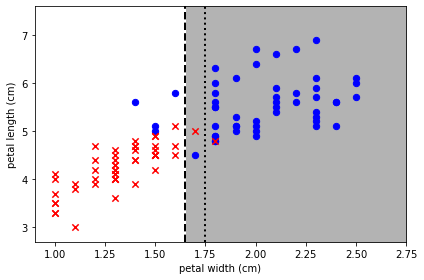

In [20]:
# Строим решающую границу

COLOUR_FIGURE = False

# We use NumPy fancy indexing to get an array of strings:
labels_1 = target_names[target]

is_setosa = (labels_1 == 'setosa')
features_1 = features[~is_setosa]
labels_1 = labels_1[~is_setosa]
is_virginica = (labels_1 == 'virginica')

# Настраиваем вручную пороги:
t = 1.65
t2 = 1.75

# Features to use: 3 & 2
f0, f1 = 3, 2

if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# Plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features_1[:, f0].min() * .9
x1 = features_1[:, f0].max() * 1.1

y0 = features_1[:, f1].min() * .9
y1 = features_1[:, f1].max() * 1.1

fig,ax = plt.subplots()
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features_1[is_virginica, f0],
            features_1[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features_1[~is_virginica, f0],
            features_1[~is_virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()

In [21]:
labels = target_names[target]
is_virginica = (labels == "virginica")# отсортировываем только 
                                      # класс virginica

correct = 0.0

for ei in range(len(features)): # Проходимся по 150 итерациям
    # выбераются все позиции, кроме одного в позиции `ei`:
    training = np.ones(len(features), bool) #Создаётся маска из булевых значений
    training[ei] = False
    testing = ~training # testing - обратный от training
    # Загружаем данные в функцию fit_model
    model = fit_model(features[training], is_virginica[training])
    # строим предсказания
    predictions = predict(model, features[testing])
    # Высчитываем точность
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 91.3%
